In [41]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
class BSTNode:
  def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

# BST insert function to avoid recursion
def BSTInsertIterative(root, value):
    node = BSTNode(value)
    if root is None:
        return node
    current = root
    while True:
        if value < current.value:
            if current.left is None:
                current.left = node
                break
            current = current.left
        else:
            if current.right is None:
                current.right = node
                break
            current = current.right
    return root

# BST height calculation to avoid recursion limit
def BSTHeightIterative(root):
    if root is None:
        return 0
    max_height = 0
    node_stack = [(root, 1)] # stores nodes along with their depth
    while node_stack:
        node, depth = node_stack.pop()
        if node is not None:
            max_height = max(max_height, depth)
            node_stack.append((node.left, depth + 1))
            node_stack.append((node.right, depth + 1))
    return max_height

def BSTSearch(node, value):
  if node == None:
    return None

  if value > node.value:
    return BSTSearch(node.right, value)

  if value < node.value:
    return BSTSearch(node.left, value)

  return node.value

def BSTInsert(root, value):
  node = BSTNode(value)
  return BSTInsertNode(root, node)

def BSTInsertNode(root, node):
  if root == None:
    return node

  if node.value == root.value:
    return root
  elif node.value < root.value:
    root.left = BSTInsertNode(root.left, node)
  elif node.value > root.value:
    root.right = BSTInsertNode(root.right, node)

  return root

def BSTHeight(node):
    if node == None:
        return 0
    return BSTGetHeight(node)

def BSTGetHeight(node):
    if node == None:
        return 0

    return 1 + max(BSTGetHeight(node.left), BSTGetHeight(node.right))


In [43]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self, tree):
        y = self.left
        self.left = y.right
        if y.right != None:
          y.right.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.right:
          self.parent.right = y
        else:
          self.parent.left = y
        y.right = self
        self.parent = y

        return tree

    def rotate_left(self, tree):
        y = self.right
        self.right = y.left
        if y.left != None:
          y.left.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.left:
          self.parent.left = y
        else:
          self.parent.right = y
        y.left = self
        self.parent = y
        return tree


In [44]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
             self = self.__insert(self.root, value)
        return self

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self = self.fix(node.left)

            else:
                self = self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self = self.fix(node.right)
            else:
                self = self.__insert(node.right, value)

        return self

    def fix(self, node):
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red() and node.is_red():
            #if there are two red nodes in a row
            P = node.parent
            C = node
            G = P.parent
            U = C.get_uncle()

            if U == None:
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red

                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()

              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            elif U.is_black():
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red
                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()
              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            else:
              #G = red
              #P = black, U = black
              G.make_red()
              P.make_black()
              U.make_black()

            if G.parent != None:
              if G.is_red() and G.parent.is_red():
                self = self.fix(G)

        self.root.make_black()
        return self

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [45]:
def draw_show_plot(run_arr, ylabel, title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

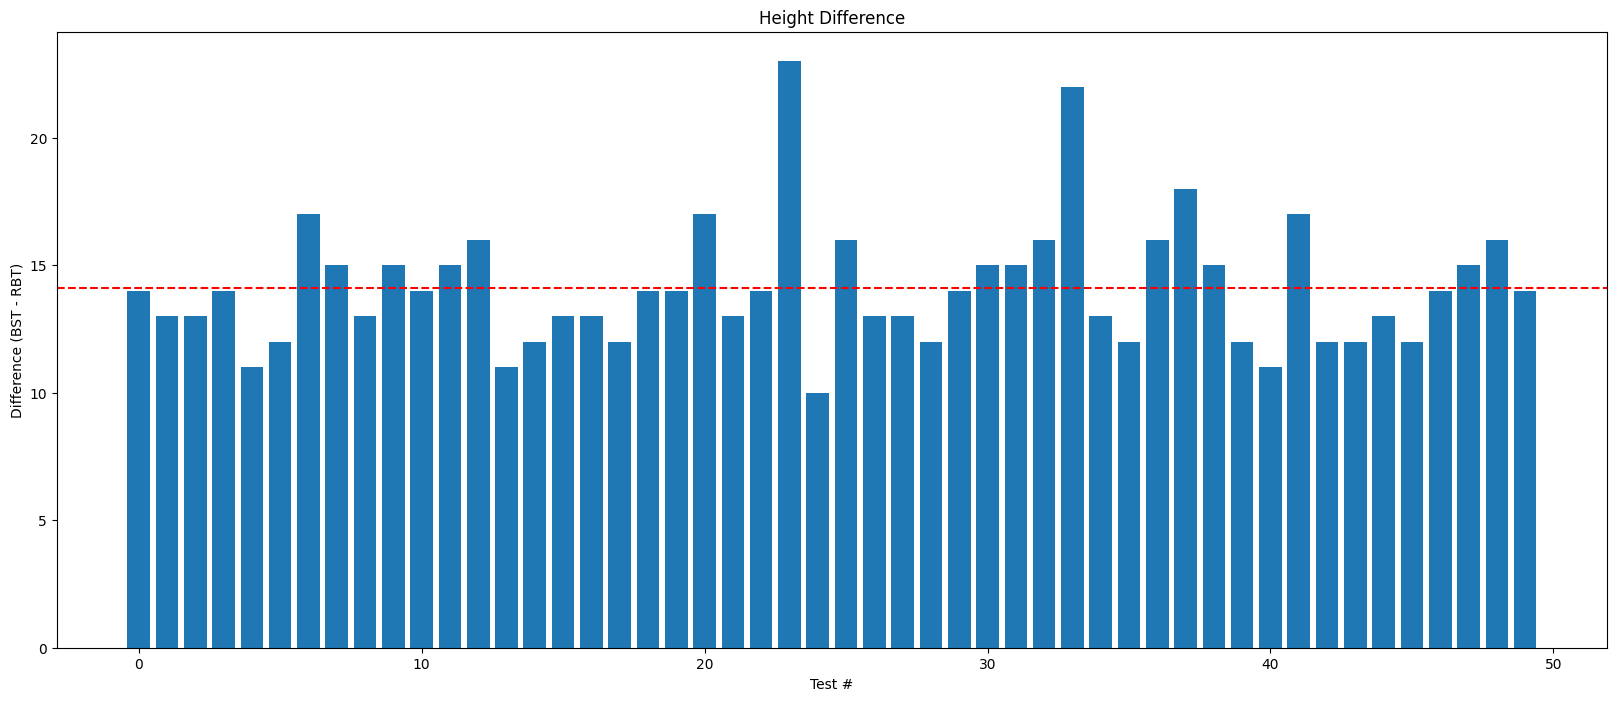

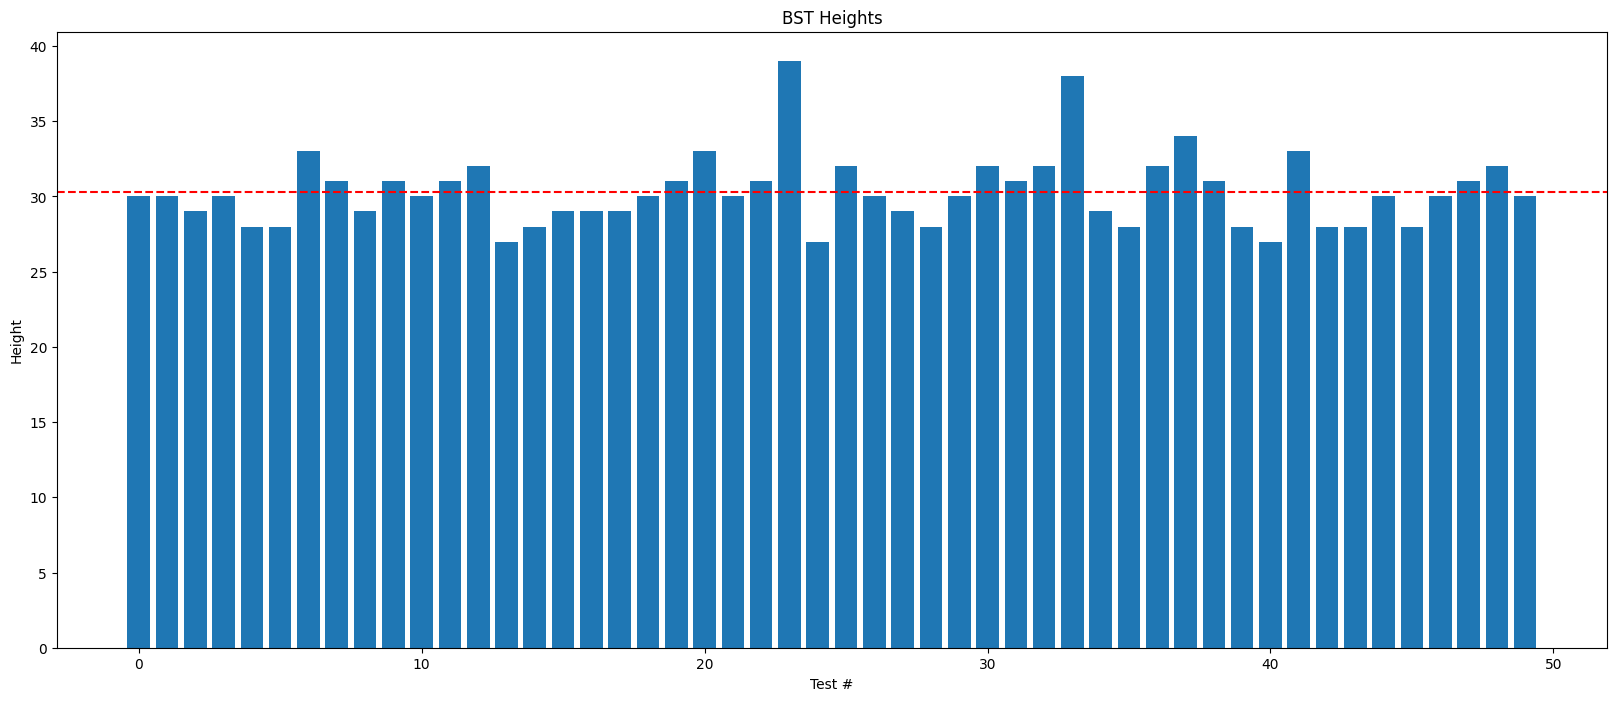

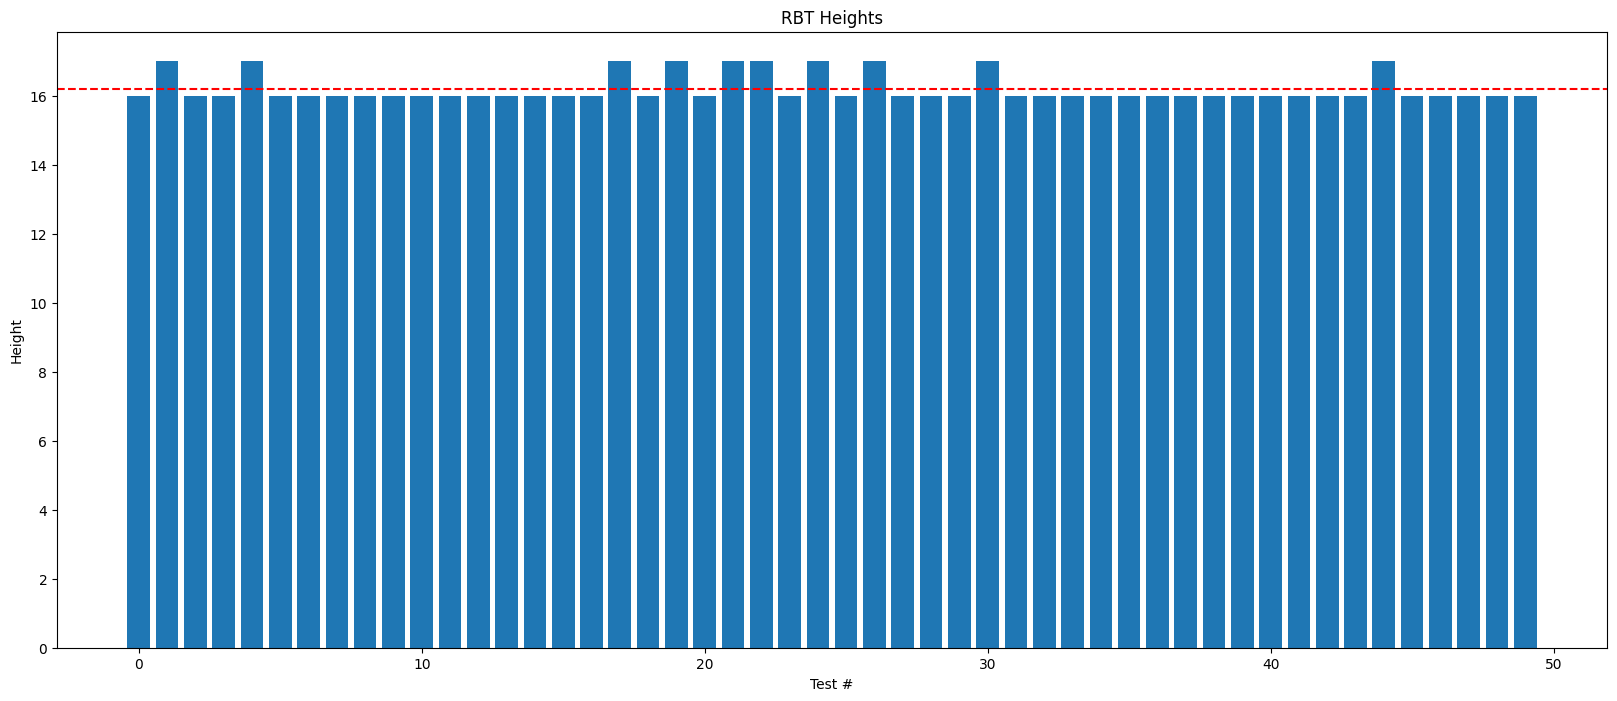

In [46]:
#50 random lists will be generated
runs = 50
#the 50 differences in height (BST height - RBT height) will be stored in differences to print later
differences = []
BSTHeights = []
RBTHeights = []

for _ in range(runs):
  #generate a random number between 1 and 20,000 to create the BST and RBT
  temp = random.randrange(1, 20000)
  BST = BSTNode(temp)
  RBT = RBTree()
  RBT.insert(temp)

  #generate the remaining random 9999 numbers and add them to both trees
  for _ in range(9999):
    temp = random.randrange(1, 20000)
    RBT.insert(temp)
    BSTInsert(BST, temp)

  bstheight = BSTHeight(BST)
  rbtheight = RBT.get_height()

  differences.append(bstheight - rbtheight)
  BSTHeights.append(bstheight)
  RBTHeights.append(rbtheight)

# print(differences)
draw_show_plot(differences, "Difference (BST - RBT)", "Height Difference")
draw_show_plot(BSTHeights, "Height", "BST Heights")
draw_show_plot(RBTHeights, "Height", "RBT Heights")

**Reflection**

Outline of Experiment:
- 10 000 random integers between 1 and 20,000 are generated and inserted into both a red-black tree and a binary search tree.
- After all of the integers have been added to the trees, the difference in their heights is found using (height of BST) - (height of RBT), as the BST should have a larger height since RBTs are self-balancing.
- This is repeated 50 times to find the average height difference, as well as the average heights of the trees.

Results:
- It can be seen in the three graphs that on average, the height of an RBT with 10 000 elements is 14 less than the height of a BST with the same elements.
- On average, the heights for the BSTs were around 30, while the heights for the RBTs were around 16.

Why is this difference important? How can this be used to select between RBTs and BSTs?
- This difference is important as it shows that depending on the input values, BSTs can start to lean towards their worst case easily, making them more comparable to a list and reducing the usefullness of the tree/binary search. This can be seen as their heights were twice the size of the RBT heights.
- Since RBTs are self-balancing, they keep their perfect black balance, so searching through them is always more efficient. They never start approaching linear time as regular BSTs do.
- This can be used to select between RBTs and BSTs as it can clearly be seen that RBTs will continue to maintain balance, no matter the size of the tree, so searching and inserting will always be faster, whereas with BSTs the balance is easily lost, and it only gets worse as more elements are added. This makes red-black trees a better option.

**Section 1.3:**  Experiment on the Impact of "Sortedness" on Tree Heights

In this experiment, we will generate lists with varying degrees of "sortedness" and observe how it affects the height of Binary Search Trees (BSTs) and Red-Black Trees (RBTs). We'll start with a perfectly sorted list and then create different versions of the list with increasing levels of unsortedness using a controlled quicksort algorithm.

**Generate a perfectly sorted list**


In [47]:
sorted_list = list(range(1, 10001))  # list of numbers from 1 to 10000


**Insert Elements into BST and RBT and Record Heights**

In [48]:
bst_root = None
rbt = RBTree()

# insert elements into BST and RBT and record their heights
for value in sorted_list:
    bst_root = BSTInsertIterative(bst_root, value)
    rbt.insert(value)

# calculate heights of both trees using the iterative height function for BST
bst_height = BSTHeightIterative(bst_root)
rbt_height = rbt.get_height()

# record the height difference
height_difference = bst_height - rbt_height

# print the heights and the height difference
print("BST Height:", bst_height)
print("RBT Height:", rbt_height)
print("Height Difference:", height_difference)


BST Height: 10000
RBT Height: 24
Height Difference: 9976


**Explanation**

A sorted list of 10,000 elements was generated and inserted into a BST and RBT. The BST height reached 10,000 degenerate linked list, while the RBT height was just 24, showcasing the self-balancing advantage of RBTs.



**Controlled Quicksort Function Explanation:**
The controlled quicksort function sorts a list while tracking the number of swaps performed, providing a measure of the list's "sortedness". It selects a pivot, partitions the array based on the pivot, and recursively sorts the partitions. This function is used to create lists with varying degrees of sortedness for experimentation.


In [59]:
# function to perform the partitioning step in quicksort
def partition(arr, start, end):
    global swap_count
    pivot = arr[end]
    p_index = start
    for i in range(start, end):
        if arr[i] <= pivot:
            arr[i], arr[p_index] = arr[p_index], arr[i]
            swap_count += 1
            p_index += 1
    arr[p_index], arr[end] = arr[end], arr[p_index]
    swap_count += 1
    return p_index

# main function that implements controlled quicksort
def controlled_quicksort(arr, start, end):
    global swap_count
    if start < end:
        p_index = partition(arr, start, end)
        controlled_quicksort(arr, start, p_index - 1)
        controlled_quicksort(arr, p_index + 1, end)

# example
swap_count = 0
sample_list = [x for x in range(1, 10001)]  # list of numbers from 1 to 10000
random.shuffle(sample_list)  # shuffle the list to simulate unsortedness
controlled_quicksort(sample_list, 0, len(sample_list) - 1)  # sort the list and count swaps

# output the total swaps to sort the list
print(f"Total swaps to sort the list: {swap_count}")


Total swaps to sort the list: 94683


**Explanation:**
The controlled quicksort algorithm sorts a list while tracking the number of swaps performed. By limiting the number of swaps allowed, we can generate lists with varying degrees of sortedness - from nearly sorted to completely unsorted. This helps simulate real-world scenarios where the data may not be perfectly sorted.

The variation of the algorithm introduces a swap limit (swap_limit) to halt the sorting process after a specific number of swaps. This allows us to create partially sorted lists with controlled levels of unsortedness.

In [60]:
def controlled_quicksort_with_limit(arr, start, end, swap_limit):
    global swap_count
    if start < end and swap_count < swap_limit:
        p_index = partition_with_limit(arr, start, end, swap_limit)
        controlled_quicksort_with_limit(arr, start, p_index - 1, swap_limit)
        controlled_quicksort_with_limit(arr, p_index + 1, end, swap_limit)

def partition_with_limit(arr, start, end, swap_limit):
    global swap_count
    pivot = arr[end]
    p_index = start
    for i in range(start, end):
        if arr[i] <= pivot:
            arr[i], arr[p_index] = arr[p_index], arr[i]
            swap_count += 1
            if swap_count >= swap_limit:
                return p_index
            p_index += 1
    arr[p_index], arr[end] = arr[end], arr[p_index]
    swap_count += 1
    return p_index

# function to generate a list with a given degree of sortedness
def generate_partially_sorted_list(size, swap_limit):
    global swap_count
    swap_count = 0
    shuffled_list = list(range(1, size + 1))
    random.shuffle(shuffled_list)
    controlled_quicksort_with_limit(shuffled_list, 0, size - 1, swap_limit)
    return shuffled_list, swap_count

# example usage: generate lists with different swap limits
swap_limits = [100, 1000, 5000, 10000, 25000, 50000, 75000]  # Swap limits to simulate different levels of sortedness
sortedness_data = []

for limit in swap_limits:
    partial_list, swaps_used = generate_partially_sorted_list(10000, limit)
    sortedness_data.append((limit, swaps_used, partial_list))

for data in sortedness_data:
    print(f"Swap limit: {data[0]}, Swaps used: {data[1]}, First 10 elements: {data[2][:10]}")


Swap limit: 100, Swaps used: 100, First 10 elements: [1942, 2343, 4335, 4775, 1474, 837, 3936, 1359, 2088, 5004]
Swap limit: 1000, Swaps used: 1000, First 10 elements: [111, 8009, 6531, 4927, 7456, 7826, 5552, 1506, 698, 2340]
Swap limit: 5000, Swaps used: 5000, First 10 elements: [459, 806, 628, 2222, 1194, 1469, 919, 1740, 381, 1709]
Swap limit: 10000, Swaps used: 10000, First 10 elements: [4268, 5499, 3548, 4109, 3791, 1815, 2878, 3306, 2636, 536]
Swap limit: 25000, Swaps used: 25000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Swap limit: 50000, Swaps used: 50000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Swap limit: 75000, Swaps used: 75000, First 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Explanation:** The controlled quicksort algorithm can be modified to halt after a set number of swaps, allowing the generation of lists with varying degrees of sortedness. This helps simulate real-world scenarios where data may not be perfectly sorted or unsorted.


In [61]:
#  BSTInsertIterative and BSTHeightIterative are already defined previously

# function to insert elements into a BST and return its height
def insert_and_get_height_bst(list_to_insert):
    bst_root = None
    for value in list_to_insert:
        bst_root = BSTInsertIterative(bst_root, value)
    return BSTHeightIterative(bst_root)

# function to insert elements into an RBT and return its height
def insert_and_get_height_rbt(list_to_insert):
    rbt = RBTree()
    for value in list_to_insert:
        rbt.insert(value)
    return rbt.get_height()

# recording heights for each degree of sortedness
heights_data = []
for data in sortedness_data:
    swap_limit, swaps_used, partial_list = data
    bst_height = insert_and_get_height_bst(partial_list)
    rbt_height = insert_and_get_height_rbt(partial_list)
    heights_data.append((swap_limit, swaps_used, bst_height, rbt_height))

# displaying the collected data
for height_data in heights_data:
    print(f"Swap limit: {height_data[0]}, Swaps used: {height_data[1]}, BST Height: {height_data[2]}, RBT Height: {height_data[3]}")


Swap limit: 100, Swaps used: 100, BST Height: 35, RBT Height: 16
Swap limit: 1000, Swaps used: 1000, BST Height: 32, RBT Height: 16
Swap limit: 5000, Swaps used: 5000, BST Height: 43, RBT Height: 17
Swap limit: 10000, Swaps used: 10000, BST Height: 40, RBT Height: 17
Swap limit: 25000, Swaps used: 25000, BST Height: 2893, RBT Height: 21
Swap limit: 50000, Swaps used: 50000, BST Height: 4632, RBT Height: 22
Swap limit: 75000, Swaps used: 75000, BST Height: 9130, RBT Height: 24


**Explanation:** The partially sorted lists were inserted into both BST and RBT, recording their respective heights. The data showed the divergence in heights between the two tree types as the degree of sortedness increased.



**Plotting the Data**

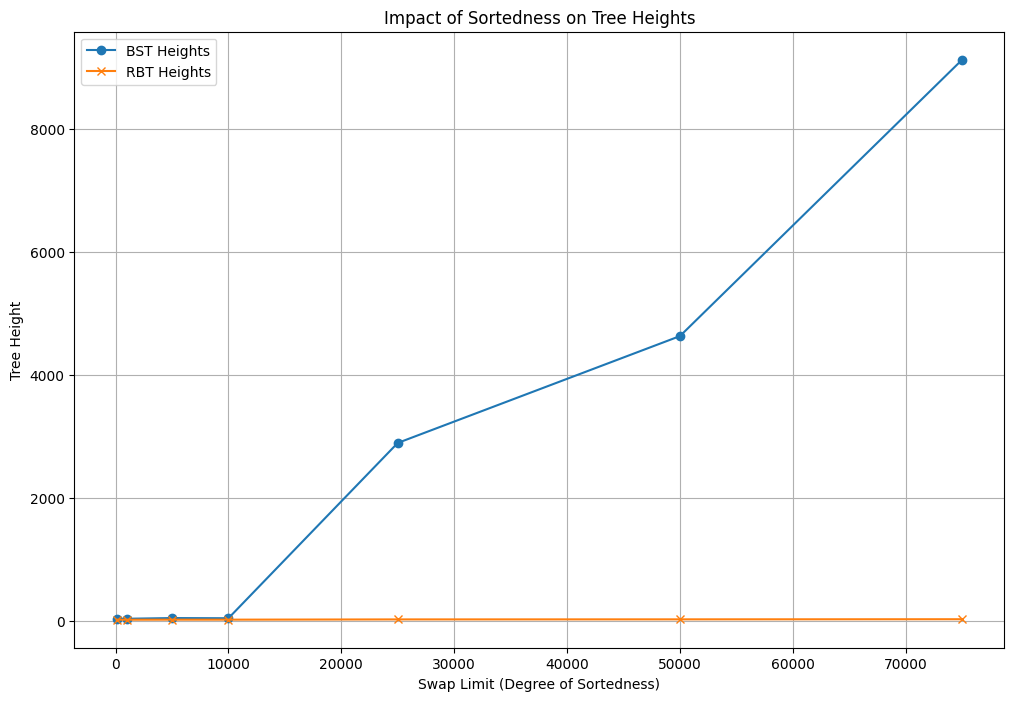

In [62]:
import matplotlib.pyplot as plt

# Extracting data for plotting
swap_limits, swaps_used, bst_heights, rbt_heights = zip(*[(d[0], d[1], d[2], d[3]) for d in heights_data])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(swap_limits, bst_heights, label='BST Heights', marker='o')
plt.plot(swap_limits, rbt_heights, label='RBT Heights', marker='x')
plt.title('Impact of Sortedness on Tree Heights')
plt.xlabel('Swap Limit (Degree of Sortedness)')
plt.ylabel('Tree Height')
plt.legend()
plt.grid(True)
plt.show()


**Explanation:** The code plots the BST and RBT heights against the swap limit (degree of sortedness). The graph shows BST height increasing steeply as data becomes more sorted, while RBT height remains relatively low and stable.



**Reflection**

The experiment showed BST height increasing dramatically with more sorted data, as BSTs degenerate into linked lists without self-balancing. In contrast, RBT height remained relatively low and stable due to self-balancing, ensuring O(log n) height even for sorted data.

The findings highlight the importance of using self-balancing trees like RBTs when dealing with potentially sorted data, to maintain efficient operations and prevent performance degradation seen in unbalanced BSTs.

RBTs are the better choice when data sortedness is unpredictable, as they provide consistent performance. Further exploration of other self-balancing tree structures under similar conditions could be insightful.
